# Đề xuất báo cáo nhóm 17

## 1. Giới thiệu

* **Lĩnh vực đề tài**: phân tích dữ liệu các ván đấu cờ vua 
* **Dữ liệu được lấy từ**: __[Chess Game Dataset](https://www.kaggle.com/datasets/datasnaek/chess?fbclid=IwAR1aNDs_wglLFDJzHOX1L9xRE3C5GqffaOHNXmyOpfwO6_sCi68t1GAuQuk)__
* **Nguồn thu nhập dữ liệu chính**: __[Lichess API](https://github.com/lichess-org/lila)__ 
* **Các trường hợp có thể xảy ra**: (chưa tổng hợp được)
* **Đối tượng dữ liệu**: chi tiết từng ván đấu (elo người chơi, thời gian, các nước đi, kết quả)
* **Ý tưởng**: Mục tiêu giúp những người chơi mới có hướng tiếp cận đến cờ vua tốt hơn. Và để chơi tốt hơn trong bộ môn này thì cần các yếu tố gì.
* **Cảm hứng**: Cờ vua là một thể loại board game cổ điển và có tầm ảnh hưởng rất lớn. Một trong những người chơi đạt thứ hạng cao IM (International master) __[Gotham Chess](https://www.youtube.com/results?search_query=gothamchess)__ với nội dung khá là thú vị đó là dự đoán elo người chơi ngoài ra còn phân tích những nước đi sai lầm của những người chơi mới, phân tích các nước đi mở đầu.. Với nguồn dữ liệu cờ vua được thu nhập từ các trận đấu online, chúng em kỳ vọng sẽ phân tích ra được những yếu tố, những điểm cần lưu ý dành cho những người chơi mới cũng như người chơi lâu năm

## Phần 2: Dữ liệu

* **Số chiều**: 20058 dòng và 16 cột
* **Các biến phân loại**: ID, rated, victory_status, winner, white_id, black_id, opening_eco, opening_name
* **Các biến số**: turns, increment_code, moves, white_rating, black_rating, opening_ply, created_at, last_move_at

In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime
import pytz
import os

In [3]:
data = pd.read_csv('.\data\games.csv', delimiter=',')
data.dataframeName = 'games.csv'
nRow, nCol = data.shape
print(f'Dự liệu có {nRow} dòng và {nCol} cột')

Dự liệu có 20058 dòng và 16 cột


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
print("Kiểm tra các dữ liệu có bị thiếu")
data.isnull().sum()

Kiểm tra các dữ liệu có bị thiếu


id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


### Mô tả các biến trong dữ liệu
**ID**: ID dùng để phân biệt các game đấu            
**rated**: Đó có phải trận đấu xếp hạng không (True/ False)           
**created_at**: Thời gian bắt đầu trận đấu <br>
**last_move_at**: Thời gian kết thúc trận đấu    
**turns**: Số lượt đi của cả 2 người chơi trong game đấu đó            
**victory_status**: Trạng thái thắng hay hòa hay thắng do hết thời gian hay do đối thủ đầu hàng    
**winner**: Người chiến thắng           
**increment_code**: chế độ trò chơi (thời gian + thời gian bonus cho mỗi nước) (đơn vị phút) <br>
**white_id**: id của người chơi trắng <br>
**white_rating**: điểm đánh giá của người dùng quân trắng <br>
**black_id**: id của người chơi quân đen <br>
**black_rating**: điểm đánh giá của người dùng quân đen <br>
**moves**: tất cả các nước đi <br>
**opening_eco**: mã khai cuộc (theo trang web eco) <br>
**opening_name**: tên khai cuộc <br>
**opening_ply**: số nước theo khai cuộc <br>

## Phần 3: Kế hoạch phân tích dữ liệu

### *Câu hỏi phân tích*

**Đề xuất**:

**Câu 1**: Khoảng cách elo giữa 2 người chơi có ảnh hưởng đến kết quả trận đấu. 

__1. Giả thuyết:__

- __A__: Có mối liên hệ giữa chênh lệch điểm elo và kết quả trận đấu
- __B__: Không có mối liên hệ giữa chênh lệch điểm elo và kết quả trận đấu

- __Biến giải thích__: white_rating, black_rating
- __Biến phản hồi__: winner

__2. Phân tích thăm dò__

In [5]:
#tạo data tỉ lệ số trận thắng của người chơi có elo cao hơn? Liệu có thay đổi theo màu cờ
black_higher_df = data[data["black_rating"] > data["white_rating"]]
white_higher_df = data[data["black_rating"] < data["white_rating"]]
black_higher_winner = len(black_higher_df[black_higher_df["winner"] == "black"])
white_higher_winner = len(white_higher_df[white_higher_df["winner"] == "white"])

Text(0, 0.5, 'Số lượng')

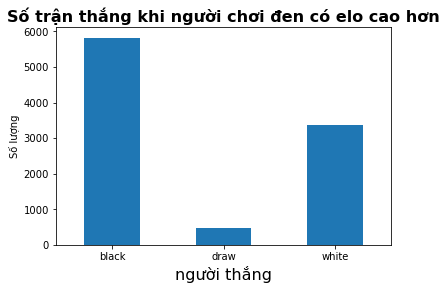

In [6]:
black_higher_df.groupby("winner").count()["id"].plot(kind = "bar", rot = 0)
plt.title("Số trận thắng khi người chơi đen có elo cao hơn", fontweight='bold', color = 'black', fontsize='16')
plt.xlabel("người thắng", fontsize = "16")
plt.ylabel("Số lượng")

Text(0, 0.5, 'Số lượng')

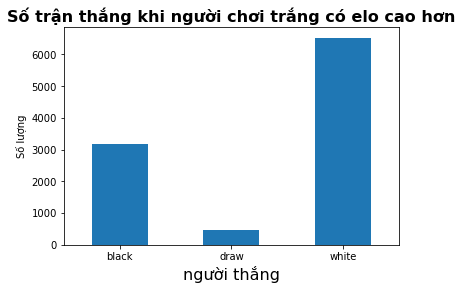

In [7]:
white_higher_df.groupby("winner").count()["id"].plot(kind = "bar", rot = 0)
plt.title("Số trận thắng khi người chơi trắng có elo cao hơn", fontweight='bold', color = 'black', fontsize='16')
plt.xlabel("người thắng", fontsize = "16")
plt.ylabel("Số lượng")

In [10]:
black_winner_per = round(black_higher_winner / len(black_higher_df) * 100, 3)
white_winner_per = round(white_higher_winner / len(black_higher_df) * 100, 3)
print(f'Người chơi đen đạt {black_winner_per}% chiến thắng so với người chơi có elo thấp hơn')
print(f'Người chơi trắng đạt {white_winner_per}% chiến thắng so với người chơi có elo thấp hơn')

Người chơi đen đạt 60.211% chiến thắng so với người chơi có elo thấp hơn
Người chơi trắng đạt 67.511% chiến thắng so với người chơi có elo thấp hơn


__3. Suy diễn__
- suy diễn thống kê có dạng categorical - categorical (có sự chênh lệch về elo - kết quả trận đấu)
- Kiểm định thống kê phù hợp cho dạng câu hỏi này là chi square - test
- giả thuyết: 
    - Null hypothesis H0: không có quan hệ giữa chênh lệch elo và kết quả trận đấu
    - Hypothesis H1: có quan hệ giữa chênh lệch elo và kết quả trận đấu

In [11]:
higher_group = [len(black_higher_df), len(white_higher_df), len(black_higher_df) + len(black_higher_df)]
winner_group = [black_higher_winner, white_higher_winner, black_higher_winner + white_higher_winner]
total_group = [len(black_higher_df) + black_higher_winner, len(white_higher_df) + white_higher_winner, len(black_higher_df) + len(black_higher_df) + black_higher_winner + white_higher_winner]
df1 = [higher_group, winner_group, total_group]
df2 = ["black", "white", "total"]
df3 = ["win", "lose", "total"]
df4 = pd.DataFrame(df1, index = df2, columns = df3)
df4

,win,lose,total
black,9671,10184,19342
white,5823,6529,12352
total,15494,16713,31694


In [12]:
(df4.iloc[0, 2] * df4.iloc[2, 0]) / df4.iloc[2, 2]
#create chi square table
chi2_table = []
p = k = 2
for i in range(p):
    lst = []
    for j in range(k):
        lst.append((df4.iloc[i, 2] * df4.iloc[2, j]) / df4.iloc[2, 2])
    chi2_table.append(lst)

x_square = 0
for i in range(p):
    for j in range(k):
        x_square += (chi2_table[i][j] - df4.iloc[i, j])**2 / chi2_table[i][j]
        
# degree = (p-1)(k-1)
degree = (p-1)*(k-1)

p_value = 1 - 𝑠𝑡𝑎𝑡𝑠.𝑐ℎ𝑖2.𝑐𝑑𝑓(x_square, degree) #use chi square test method

print(p_value)

0.00037475990586677277


Dựa vào kết quả trên ta thấy rằng khả năng mà người chơi có elo cao không có liên quan đến kết quả trận đấu là không đáng kể p_value = 0.003 < 0.05. Nên ta có thể bác bỏ H0. 

### Kết luận câu hỏi 1:
- Dựa vào biểu đồ trực quan trong phân tích thăm dò, người chơi với elo cao hơn thường có khả năng thắng cao hơn khi đối đầu với người chơi có elo thấp hơn kể cả khi họ chơi màu quân cờ khác.
- Qua kiểm định thống kê, ta đã cấp một bằng chứng đủ mạnh để bác bỏ giả thuyết ngược rằng sự chênh lệch giữa elo giữa 2 người chơi không tác động đến kết quả ván đấu với xác xuất.
- Tuy nhiên điều đó không có nghĩa là người có elo cao hơn sẽ luôn thắng người chơi có elo thấp hơn. Do còn tùy thuộc vào nhiều yếu tố như số nước đi blunder(nước đi lỗi), thời gian, ... 


### Chứng minh giả thuyết: 

**Câu 2**: Sử dụng hệ thống khai cuộc nửa thoáng (1.e4 đen đi khác e5) đem lại lợi thế cho trắng 

__Giả thuyết:__

- __A__: Có mối liên hệ hệ thống khai cuộc và tỉ lệ thắng giữa trắng và đen
- __B__: Hệ thống khai cuộc không có liên quan đến người chơi  

- __Biến giải thích__: white_rating, black_rating
- __Biến phản hồi__: count(opening_eco), opening_ply

In [13]:
temp = data["moves"].apply(lambda x: x.split(" "))
opening_system = []
for i in range(len(temp)):
    lst = temp.iloc[i]
    if len(lst) < 2:
        opening_system.append("không xác định")
        continue
    if lst[0] == "e4":
        if lst[1] == "e5":
            opening_system.append("thoáng")
        else:
            opening_system.append("nửa thoáng")
    else:
        opening_system.append("kín")

Text(0.5, 1.0, 'Biểu đồ cột thể hiện số lượng trận thắng của các hệ thống khai cuộc đối với từng màu quân cờ')

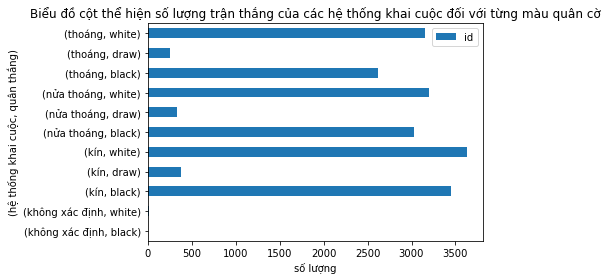

In [14]:
# id winner system
# 0 black   kin
# 1 white   thoang

df = pd.DataFrame(data[["id", "winner"]])
df["system"] = opening_system
df1 = df.groupby(["system", "winner"]).count()
df1.plot(kind = "barh", rot = 0)
plt.ylabel("(hệ thống khai cuộc, quân thắng)")
plt.xlabel("số lượng")
plt.title("Biểu đồ cột thể hiện số lượng trận thắng của các hệ thống khai cuộc đối với từng màu quân cờ")

In [15]:
temp1 = df.groupby(["system", "winner"]).count()
temp2 = df.groupby(["system"]).count()["id"]

#khai cuộc kín
black_kin_per = (temp1.loc["kín", "black"] / temp2.loc["kín"])[0]
bkp = round(black_kin_per*100, 2)
print(f'Người chơi đen đạt {bkp}% chiến thắng so với người chơi trắng trong trường hợp khai cuộc kín')
white_kin_per = (temp1.loc["kín", "white"] / temp2.loc["kín"])[0]
wkp = round(white_kin_per*100, 2)
print(f'Người chơi trắng đạt {wkp}% chiến thắng so với người chơi đen trong trường hợp khai cuộc kín')

#khai cuộc nửa thoáng 
black_nuathoang_per = (temp1.loc["nửa thoáng", "black"] / temp2.loc["nửa thoáng"])[0]
bntp = round(black_nuathoang_per*100, 2)
print(f'Người chơi đen đạt {bntp}% chiến thắng so với người chơi trắng trong trường hợp khai cuộc nửa thoáng')
white_nuathoang_per = (temp1.loc["nửa thoáng", "white"] / temp2.loc["nửa thoáng"])[0]
wntp = round(white_nuathoang_per*100, 2)
print(f'Người chơi trắng đạt {wntp}% chiến thắng so với người chơi đen trong trường hợp khai cuộc nửa thoáng')

#khai cuộc thoáng
black_thoang_per = (temp1.loc["thoáng", "black"] / temp2.loc["thoáng"])[0]
btp = round(black_thoang_per*100, 2)
print(f'Người chơi đen đạt {btp}% chiến thắng so với người chơi trắng trong trường hợp khai cuộc thoáng')
white_thoang_per = (temp1.loc["thoáng", "white"] / temp2.loc["thoáng"])[0]
wtp = round(white_thoang_per*100, 2)
print(f'Người chơi trắng đạt {wtp}% chiến thắng so với người chơi đen trong trường hợp khai cuộc thoáng')

Người chơi đen đạt 46.34% chiến thắng so với người chơi trắng trong trường hợp khai cuộc kín
Người chơi trắng đạt 48.65% chiến thắng so với người chơi đen trong trường hợp khai cuộc kín
Người chơi đen đạt 46.19% chiến thắng so với người chơi trắng trong trường hợp khai cuộc nửa thoáng
Người chơi trắng đạt 48.8% chiến thắng so với người chơi đen trong trường hợp khai cuộc nửa thoáng
Người chơi đen đạt 43.49% chiến thắng so với người chơi trắng trong trường hợp khai cuộc thoáng
Người chơi trắng đạt 52.4% chiến thắng so với người chơi đen trong trường hợp khai cuộc thoáng


**Câu 3**: Khai cuộc mà những người chơi có elo cao ưa thích sử dụng? Liệu có đúng cho một quần thể

__Giả thuyết:__

- __A__: Khai cuộc được ưa thích nhất trong tập mẫu không có sự khác biệt với quần thể
- __B__: Có sự khác biệt giữa tập mẫu và quần thể

- __Biến giải thích__: white_rating, black_rating, opening_name

Ta chỉ xem xét trận đấu giữa những người chơi có kinh nghiệm (thường sẽ có elo cao ở đây ta xét elo trung bình > 1500)

In [16]:
temp = data[(data.white_rating + data.black_rating) / 2 > 1500]
dt = temp["opening_name"].value_counts()
col = ["opening_name", "count"]
dt

Sicilian Defense                                                212
Sicilian Defense: Bowdler Attack                                190
French Defense: Knight Variation                                173
Queen's Pawn Game: Mason Attack                                 157
Scotch Game                                                     155
                                                               ... 
Modern Defense: Beefeater Variation                               1
Semi-Slav Defense: Meran Variation |  Wade Variation              1
Benko Gambit Accepted |  Yugoslav |  without 7...Bxf1             1
Sicilian Defense: Nimzowitsch Variation |  Main Line              1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation      1
Name: opening_name, Length: 1363, dtype: int64

In [26]:
temp = data["moves"].apply(lambda x: x.split(" "))
sicilian_count = 0
for i in range(len(temp)):
    lst = temp.iloc[i]
    if (len(lst) < 2):
        continue
    if (lst[0] == "e4" and lst[1] == "c5"):
        sicilian_count += 1
sicilian_per = sicilian_count / len(temp)

In [37]:
most_open = dt.index[:5][0]
most_open_per = round((dt[0] / len(temp)) * 100, 2)
print(f"Kiểu khai cuộc được sử dụng nhiều nhất bởi người chơi: {most_open} với tỉ lệ {round(sicilian_per, 2) * 100}%")

Kiểu khai cuộc được sử dụng nhiều nhất bởi người chơi: Sicilian Defense với tỉ lệ 13.0%


__Ta có tỷ lệ cho mẫu là p = 0.074, lúc này ta ước lượng điểm cho tỉ lệ quần thể p_hat với khoảng tin cậy là 95% cho p.__

In [29]:
n = len(temp)
p_hat = sicilian_per
print(f"n*p_hat = {n} * {p_hat} = {round(n*p_hat, 2)}\nn*(1-p^hat) = {n} * (1 - {p_hat}) = {round(n*(1-p_hat), 2)}")

n*p_hat = 20058 * 0.12867683717220063 = 2581.0
n*(1-p^hat) = 20058 * (1 - 0.12867683717220063) = 17477.0


__Ta thấy n*p > 10, n*(1-p) > 10,  nên ta có:__ (p_hat (+-) z_a/2*sqrt((p-(1-p_hat)) / n) (a = 0.05 -> z_a/2 = 1.96)

In [30]:
vari = 1.96*math.sqrt((p_hat*(1-p_hat))/n)
print(f"Ước lượng khoảng tỉ lệ cho quần thể sử dụng khai cuộc {most_open} với khoảng tin cậy 95% là: ({p_hat - vari}, {p_hat + vari})")

Ước lượng khoảng tỉ lệ cho quần thể sử dụng khai cuộc Sicilian Defense với khoảng tin cậy 95% là: (0.12404287935306485, 0.1333107949913364)


### Kiểm định giả thuyết:
- theo [Wikipedia](https://en.wikipedia.org/wiki/Sicilian_Defence): sicilian defence được sử dụng đến 17% bởi grand master(elo > 2000) và 25% trong chess imformant database.(gần 350,000 ván đấu) (phần 1, đoạn đầu, dòng cuối)
- kiểm định giả thuyết phù hợp cho dạng này là z-test cho tỷ lệ
    - Nulll hypothesis H0 có sự khác biệt giữa mẫu và quần thể: p = p0

In [31]:
df_times = data[['created_at','last_move_at']].copy()

df_times['created_at_dt'] = pd.to_datetime(df_times['created_at']/1000, 
                                           unit='s', 
                                           origin='unix')

df_times["created_at_dt"].apply(lambda x: x.year).describe()

count    20058.000000
mean      2016.495563
std          0.885647
min       2013.000000
25%       2016.000000
50%       2017.000000
75%       2017.000000
max       2017.000000
Name: created_at_dt, dtype: float64

Do dữ liệu được lấy trong các năm chủ yếu là 2016 và 2017 nên dựa theo nguồn dữ liệu từ [Chess.com](https://www.chess.com/openings/Sicilian-Defense) ta chọn p0 = 0.17 làm tỉ lệ cho quần thể

In [36]:
p = 0.17
SE = math.sqrt((p_hat*(1-p_hat)) / n)
z = (p_hat - p) / SE
degree = n - 1
p_value = 1 - stats.t.cdf(z, degree)
p_value

1.0

ta không thể bác bỏ giả thuyết H0 do p_value = 1 > 0.05 và coi như rằng dữ liệu mẫu khác biệt so với quần thể

### Kết luận giả thuyết 3:
- từ phân tích thăm dò ta thấy khai cuộc sicilian là khai cuộc được nhiều người chơi ưa chuộng nhất.
- Kiểm định thống kê cho thấy rằng tập dữ liệu mẫu là khác biệt "hoàn toàn" so với quần thể khi p_value = 1
- Tuy vậy ta vẫn thấy được rằng sicilian defense vẫn là khai cuộc nên học cho người chơi mới do tính phổ biến của nó.

### Phương pháp thống kê
   * Nghiên cứu mối liên hệ giữa các hiện tượng

### Kết quả từ phương pháp thống kê:
    1. Ta có thể dễ dàng cảm nhận được rằng những người chơi có elo cao hơn sẽ có khả năng thắng cao hơn
    2. Việc phân tích các hệ thống khai cuộc đem lại kết quả khá thú vị khi người cầm quân trắng luôn có tỉ lệ thắng cao hơn hay nói cách khác người cầm quân trắng có tỉ lệ thắng cao hơn bên đen 
    3. Khai cuộc sicilian (e4, c5) là khai cuộc rất được ưa chuộng trong các trận đấu cho dù tỉ lệ đó ở quần thể khác với tỉ lệ trong tập mẫu đang phân tích

### nhược điểm
    - do chỉ có thể xử lí từ các biến đơn giản trong khi biến "moves" mới đem lại nhiều phân tích "thú vị" hơn nên ý nghĩa trong bài phân tích này không được cao. Do giới hạn về thời gian và năng lực người phân tích.
    - Vẫn còn nhiều biến khi lấy về bị lỗi như "created_at" và "last_moved_at" trong quá trình định dạng về bị sai số =, thậm chí bị trùng nên không thể phân tích thêm thời gian.